In [2]:
import pandas as pd
from configparser import ConfigParser
import psycopg2
import pandas.io.sql as sqlio
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
# Read in csv files
dce_df=pd.read_csv("../Data/NREL 2019 Survey Data/data/survey_res_dce.csv")
#fcev_df=pd.read_csv("..Data/NREL 2019 Survey Data/data/survey_res_fcev.csv")
main_df=pd.read_csv("../Data/NREL 2019 Survey Data/data/survey_res_main.csv")
person_df=pd.read_csv("../Data/NREL 2019 Survey Data/data/survey_res_person.csv")
pev_df=pd.read_csv("../Data/NREL 2019 Survey Data/data/survey_res_pev.csv")
vehicle_df=pd.read_csv("../Data//NREL 2019 Survey Data/data/survey_res_vehicle.csv")

In [4]:
col_drop=[
    'vehicletype_consideration_1',
    'vehicletype_consideration_2',
    'vehicletype_consideration_3',
    'vehicletype_consideration_4',
    'vehicletype_consideration_5',
    'vehicletype_consideration_6',
    'vehicletype_consideration_7',
    'vehicletype_consideration_8',
    'vehicletype_consideration_9',
    'vehicletype_consideration_10',
    'vehicletype_consideration_11',
    'vehicletype_consideration_12',
    'vehicletype_consideration_13',
    'fueltype_consideration_1_1',
    'fueltype_consideration_2_1',
    'fueltype_consideration_3_1',
    'fueltype_consideration_4_1',
    'fueltype_consideration_5_1',
    'fueltype_consideration_6_1',
    'fueltype_consideration_7_1',
    'fueltype_consideration_8_1',
    'fueltype_consideration_9_1',
    'fueltype_consideration_10_1',
    'fueltype_consideration_11_1',
    'fueltype_consideration_12_1',
    'fueltype_consideration_13_1',
    'fueltype_consideration_1_2',
    'fueltype_consideration_2_2',
    'fueltype_consideration_3_2',
    'fueltype_consideration_4_2',
    'fueltype_consideration_5_2',
    'fueltype_consideration_6_2',
    'fueltype_consideration_7_2',
    'fueltype_consideration_8_2',
    'fueltype_consideration_9_2',
    'fueltype_consideration_10_2',
    'fueltype_consideration_11_2',
    'fueltype_consideration_12_2',
    'fueltype_consideration_13_2',
    'fueltype_consideration_1_3',
    'fueltype_consideration_2_3',
    'fueltype_consideration_3_3',
    'fueltype_consideration_4_3',
    'fueltype_consideration_5_3',
    'fueltype_consideration_6_3',
    'fueltype_consideration_7_3',
    'fueltype_consideration_8_3',
    'fueltype_consideration_9_3',
    'fueltype_consideration_10_3',
    'fueltype_consideration_11_3',
    'fueltype_consideration_12_3',
    'fueltype_consideration_13_3',
    'fueltype_consideration_1_4',
    'fueltype_consideration_2_4',
    'fueltype_consideration_3_4',
    'fueltype_consideration_4_4',
    'fueltype_consideration_5_4',
    'fueltype_consideration_6_4',
    'fueltype_consideration_7_4',
    'fueltype_consideration_8_4',
    'fueltype_consideration_9_4',
    'fueltype_consideration_10_4',
    'fueltype_consideration_11_4',
    'fueltype_consideration_12_4',
    'fueltype_consideration_13_4',
    'fueltype_consideration_1_5',
    'fueltype_consideration_2_5',
    'fueltype_consideration_3_5',
    'fueltype_consideration_4_5',
    'fueltype_consideration_5_5',
    'fueltype_consideration_6_5',
    'fueltype_consideration_7_5',
    'fueltype_consideration_8_5',
    'fueltype_consideration_9_5',
    'fueltype_consideration_10_5',
    'fueltype_consideration_11_5',
    'fueltype_consideration_12_5',
    'fueltype_consideration_13_5',
    'fueltype_consideration_1_6',
    'fueltype_consideration_2_6',
    'fueltype_consideration_3_6',
    'fueltype_consideration_4_6',
    'fueltype_consideration_5_6',
    'fueltype_consideration_6_6',
    'fueltype_consideration_7_6',
    'fueltype_consideration_8_6',
    'fueltype_consideration_9_6',
    'fueltype_consideration_10_6',
    'fueltype_consideration_11_6',
    'fueltype_consideration_12_6',
    'fueltype_consideration_13_6',
    'fueltype_consideration_1_7',
    'fueltype_consideration_2_7',
    'fueltype_consideration_3_7',
    'fueltype_consideration_4_7',
    'fueltype_consideration_5_7',
    'fueltype_consideration_6_7',
    'fueltype_consideration_7_7',
    'fueltype_consideration_8_7',
    'fueltype_consideration_9_7',
    'fueltype_consideration_10_7',
    'fueltype_consideration_11_7',
    'fueltype_consideration_12_7',
    'fueltype_consideration_13_7',
    'fueltype_consideration_1_8',
    'fueltype_consideration_2_8',
    'fueltype_consideration_3_8',
    'fueltype_consideration_4_8',
    'fueltype_consideration_5_8',
    'fueltype_consideration_6_8',
    'fueltype_consideration_7_8',
    'fueltype_consideration_8_8',
    'fueltype_consideration_9_8',
    'fueltype_consideration_10_8',
    'fueltype_consideration_11_8',
    'fueltype_consideration_12_8',
    'fueltype_consideration_13_8',
    'consideration_1',
    'consideration_2',
    'consideration_3',
    'consideration_4',
    'consideration_5',
    'consideration_6',
    'consideration_7',
    'consideration_8',
    'consideration_9',
    'consideration_10',
    'consideration_11',
    'consideration_12',
    'consideration_13',
    'consideration_14',
    'consideration_15',
    'consideration_16',
    'consideration_17',
    'consideration_18',
    'consideration_19',
    'consideration_20',
    'consideration_21',
    'consideration_22',
    'consideration_23',
    'consideration_24',
    'consideration_25',
    'consideration_26',
    'consideration_27',
    'consideration_28',
    'consideration_29',
    'consideration_30',
    'consideration_31',
    'consideration_32',
    'consideration_33',
    'consideration_34',
    'consideration_35',
    'consideration_36',
    'consideration_37',
    'consideration_38',
    'consideration_39',
    'consideration_40',
    'consideration_41',
    'consideration_42',
    'consideration_43',
    'consideration_44',
    'consideration_45',
    'consideration_46',
    'consideration_47',
    'consideration_48',
    'consideration_49',
    'consideration_50',
    'consideration_51',
    'consideration_52',
    'consideration_53',
    'consideration_54',
    'consideration_55',
    'consideration_56',
    'consideration_57',
    'consideration_58',
    'consideration_59',
    'consideration_60',
    'consideration_61',
    'consideration_62',
    'consideration_63',
    'consideration_64',
    'consideration_65',
    'consideration_66',
    'consideration_67',
    'consideration_68',
    'consideration_69',
    'consideration_70',
    'consideration_71',
    'consideration_72',
    'consideration_73',
    'consideration_74',
    'consideration_75',
    'consideration_76',
    'consideration_77',
    'consideration_78',
    'consideration_79',
    'consideration_80',
    'consideration_81',
    'consideration_82',
    'consideration_83',
    'consideration_84',
    'consideration_85',
    'consideration_86',
    'consideration_87',
    'consideration_88',
    'consideration_89',
    'consideration_90',
    'consideration_91',
    'consideration_92',
    'consideration_93',
    'consideration_94',
    'consideration_95',
    'consideration_96',
    'consideration_97',
    'consideration_98',
    'consideration_99',
    'consideration_100',
    'consideration_101',
    'consideration_102',
    'consideration_103',
    'consideration_104']
main_df.drop(columns=col_drop, inplace=True)

In [5]:
#add ev_flag column
vehicle_df['ev_flag'] = 0

vehicle_df.loc[vehicle_df['fuel_clean'] == 3,'ev_flag'] = 1
vehicle_df.loc[vehicle_df['fuel_clean'] == 5,'ev_flag'] = 1
vehicle_df                                 

,sampno,vehno,vehicle_num,num_hh_vehicles,year,make,make_other,make_clean,model,model_other,...,business_miles,company_primary_driver,company_primary_driver_id,other_drivers,behavior_1,behavior_2,behavior_3,behavior_4,behavior_5,ev_flag
0,190001,1,1,1,1998,TOYOTA,,TOYOTA,REDACTED,REDACTED,...,,,,,,,,,,0
1,190003,1,1,2,2015,LEXUS,,LEXUS,NaN,NaN,...,,,,,,,,,,0
2,190005,2,2,2,2002,CHRYSLER,,CHRYSLER,NaN,NaN,...,,,,,,,,,,0
3,190006,1,1,2,2018,TOYOTA,,TOYOTA,NaN,NaN,...,,,,,,,,,,0
4,190009,3,3,3,2002,HONDA,,HONDA,NaN,NaN,...,,,,,,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,192322,2,2,2,2013,SUBARU,,SUBARU,NaN,NaN,...,,,,,,,,,,0
8045,192327,2,2,2,2018,TESLA,,TESLA,NaN,NaN,...,,,,,,,,,,1
8046,192334,4,4,4,2013,SCION,,SCION,NaN,NaN,...,,,,,,,,,,0
8047,192330,2,2,2,2015,FORD,,FORD,NaN,NaN,...,,,,,,,,,,0


In [6]:
#Count of total ev flagged vehicles
vehicle_df['ev_flag'].sum()

553

In [7]:
#Get respondents demographics
#person_df relationship 8 = self.
respondent_df = person_df.loc[person_df["relationship"]==8]
respondent_df

,sampno,perid,perno,relationship,gender,employment,student,education,license,vehno,...,school_distance,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x
0,190001,190001.p01,1,8,1,4,4,6,1,190001.v01,...,,2,0,0,0,0,1,0,0,
1,190003,190003.p01,1,8,2,4,4,8,1,190003.v01,...,,2,0,0,0,0,1,0,0,
2,190002,190002.p01,1,8,2,4,4,1,2,,...,,2,0,0,0,0,1,0,0,
3,190005,190005.p01,1,8,1,4,4,6,1,190005.v02,...,,2,0,0,0,0,1,0,0,
9,190004,190004.p01,1,8,2,4,1,4,2,,...,5,1,0,0,0,0,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8358,190792,190792.p01,1,8,1,1,4,6,1,190792.v02,...,,2,0,0,0,0,0,0,1,
8359,190795,190795.p01,1,8,2,1,4,8,1,190795.v01,...,,2,0,0,0,0,0,0,1,
8361,190845,190845.p01,1,8,2,2,4,5,1,190845.v01,...,,2,0,0,0,0,1,0,0,
8362,190803,190803.p01,1,8,2,1,4,8,1,190803.v01,...,,2,0,0,0,0,1,0,0,


In [8]:
#Merge respondents with Main table
respondent_merged_df = main_df.merge(respondent_df, how='left', on='sampno') 
respondent_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,school_distance,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x
0,192850,4,1,3,1,37,4,1,2,0,...,,2,0,0,0,0,1,0,0,
1,193449,4,1,3,1,34,6,3,3,0,...,,1,0,0,0,0,1,0,0,
2,193440,4,1,3,1,50,1,1,2,0,...,,2,0,0,0,0,1,0,0,
3,193133,4,1,4,1,33,2,1,1,0,...,,2,0,0,0,0,1,0,0,
4,193400,4,1,3,1,1,5,3,3,0,...,,2,0,1,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,190256,2,1,3,1,19,2,2,3,1,...,,1,0,0,0,0,1,0,0,
4244,191249,5,1,3,1,30,2,3,3,0,...,,2,0,1,0,0,0,0,0,
4245,190327,2,1,3,1,36,2,2,3,0,...,,2,0,0,0,0,1,0,0,
4246,191658,5,1,4,1,19,2,2,3,1,...,,2,0,0,0,0,1,0,0,


In [9]:
#Get list of all PEV owners
PEV_owners=pev_df.sampno 
PEV_owners.tolist()
len(PEV_owners)


451

In [10]:
#Create PEV owner column, populate from list
respondent_merged_df["PEV owner"] = "No"
for owner in PEV_owners:
    respondent_merged_df.loc[respondent_merged_df.sampno == owner,'PEV owner'] = "Yes"

In [11]:
#Seperate df for PEV's and non PEVS
owner_merged_df =respondent_merged_df.loc[respondent_merged_df['PEV owner'] == "Yes"]
owner_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x,PEV owner
40,192569,4,1,3,1,31,6,2,4,0,...,2,0,0,0,0,1,0,0,,Yes
41,192756,4,1,3,1,37,4,1,2,0,...,2,0,0,0,0,1,0,0,,Yes
105,192597,4,1,3,1,7,5,2,2,0,...,2,0,0,0,0,1,0,0,,Yes
129,192047,4,1,3,1,1,5,2,3,0,...,2,0,0,0,0,1,0,0,,Yes
132,192359,4,1,4,1,40,3,3,2,0,...,2,0,0,0,0,1,0,0,,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,194031,5,1,2,1,19,2,1,3,0,...,2,0,0,0,0,1,0,0,,Yes
4241,190293,2,1,3,1,37,4,3,3,0,...,2,0,1,0,0,0,0,0,,Yes
4242,190650,5,1,3,1,27,3,1,3,0,...,2,0,0,0,0,1,0,0,,Yes
4243,190256,2,1,3,1,19,2,2,3,1,...,1,0,0,0,0,1,0,0,,Yes


In [12]:
nonowner_merged_df =respondent_merged_df.loc[respondent_merged_df['PEV owner'] == "No"]
nonowner_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x,PEV owner
0,192850,4,1,3,1,37,4,1,2,0,...,2,0,0,0,0,1,0,0,,No
1,193449,4,1,3,1,34,6,3,3,0,...,1,0,0,0,0,1,0,0,,No
2,193440,4,1,3,1,50,1,1,2,0,...,2,0,0,0,0,1,0,0,,No
3,193133,4,1,4,1,33,2,1,1,0,...,2,0,0,0,0,1,0,0,,No
4,193400,4,1,3,1,1,5,3,3,0,...,2,0,1,0,0,0,0,0,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,191231,5,1,4,1,30,2,3,2,0,...,2,0,0,0,0,1,0,0,,No
4239,190906,5,1,3,1,1,5,3,6,0,...,2,0,0,0,0,1,0,0,,No
4244,191249,5,1,3,1,30,2,3,3,0,...,2,0,1,0,0,0,0,0,,No
4246,191658,5,1,4,1,19,2,2,3,1,...,2,0,0,0,0,1,0,0,,No


In [13]:
respondent_merged_df["Male/Female"] =respondent_merged_df[""] = "Other/Not stated"
respondent_merged_df.loc[respondent_merged_df.gender == 1,'Male/Female'] = "Male"
respondent_merged_df.loc[respondent_merged_df.gender == 2,'Male/Female'] = "Female"

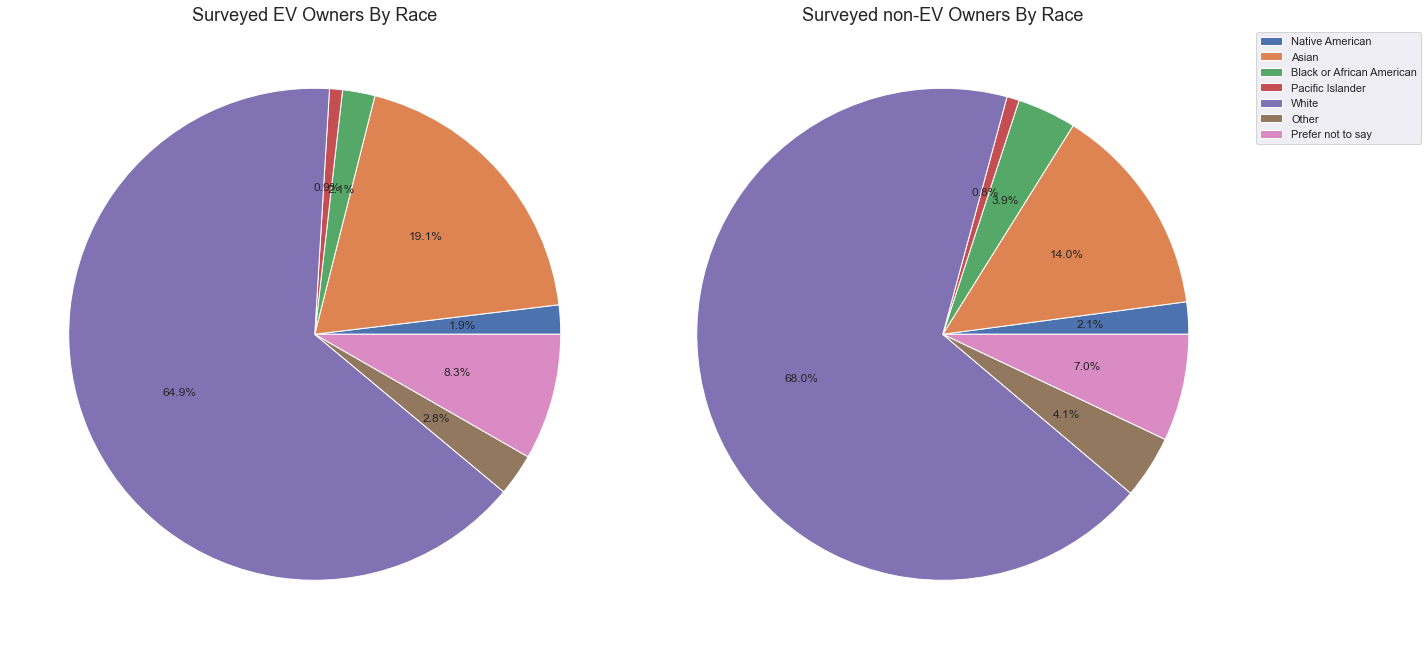

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies

labels = "Native American","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say"
values =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Race', fontsize=18)


values =(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
ax2.pie(values,autopct = '%1.1f%%') #plot second pie
#ax2.title('Surveyed non-EV Owners By Race')
ax2.legend(labels,bbox_to_anchor=(1, 1))
#plt.figtext(1,1,'Surveyed EV Owners v non-EV Owners By Race', fontsize=18, ha='center')
ax2.set_title('Surveyed non-EV Owners By Race', fontsize=18)
plt.tight_layout()

In [15]:
owner_race =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
owner_race.values
no_own_by_race=(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
print(owner_race.values,no_own_by_race.values)


[  9  90  10   4 305  13  39] [  83  550  152   32 2673  163  276]


In [16]:
Gender_merged_df =respondent_merged_df.loc[respondent_merged_df['Male/Female'] != "Other/Not stated"]
Gender_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x,PEV owner,Male/Female,
0,192850,4,1,3,1,37,4,1,2,0,...,0,0,0,1,0,0,,No,Male,Other/Not stated
1,193449,4,1,3,1,34,6,3,3,0,...,0,0,0,1,0,0,,No,Female,Other/Not stated
2,193440,4,1,3,1,50,1,1,2,0,...,0,0,0,1,0,0,,No,Female,Other/Not stated
3,193133,4,1,4,1,33,2,1,1,0,...,0,0,0,1,0,0,,No,Female,Other/Not stated
4,193400,4,1,3,1,1,5,3,3,0,...,1,0,0,0,0,0,,No,Female,Other/Not stated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,190256,2,1,3,1,19,2,2,3,1,...,0,0,0,1,0,0,,Yes,Male,Other/Not stated
4244,191249,5,1,3,1,30,2,3,3,0,...,1,0,0,0,0,0,,No,Male,Other/Not stated
4245,190327,2,1,3,1,36,2,2,3,0,...,0,0,0,1,0,0,,Yes,Male,Other/Not stated
4246,191658,5,1,4,1,19,2,2,3,1,...,0,0,0,1,0,0,,No,Male,Other/Not stated


In [17]:
owner_merged_df.sampno.count()

451

# Demographic Comparison between our EV and non-EV owning responders.

In [18]:
print(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
print(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())

race_1      9
race_2     90
race_3     10
race_4      4
race_5    305
race_6     13
race_7     39
dtype: int64
race_1      83
race_2     550
race_3     152
race_4      32
race_5    2673
race_6     163
race_7     276
dtype: int64


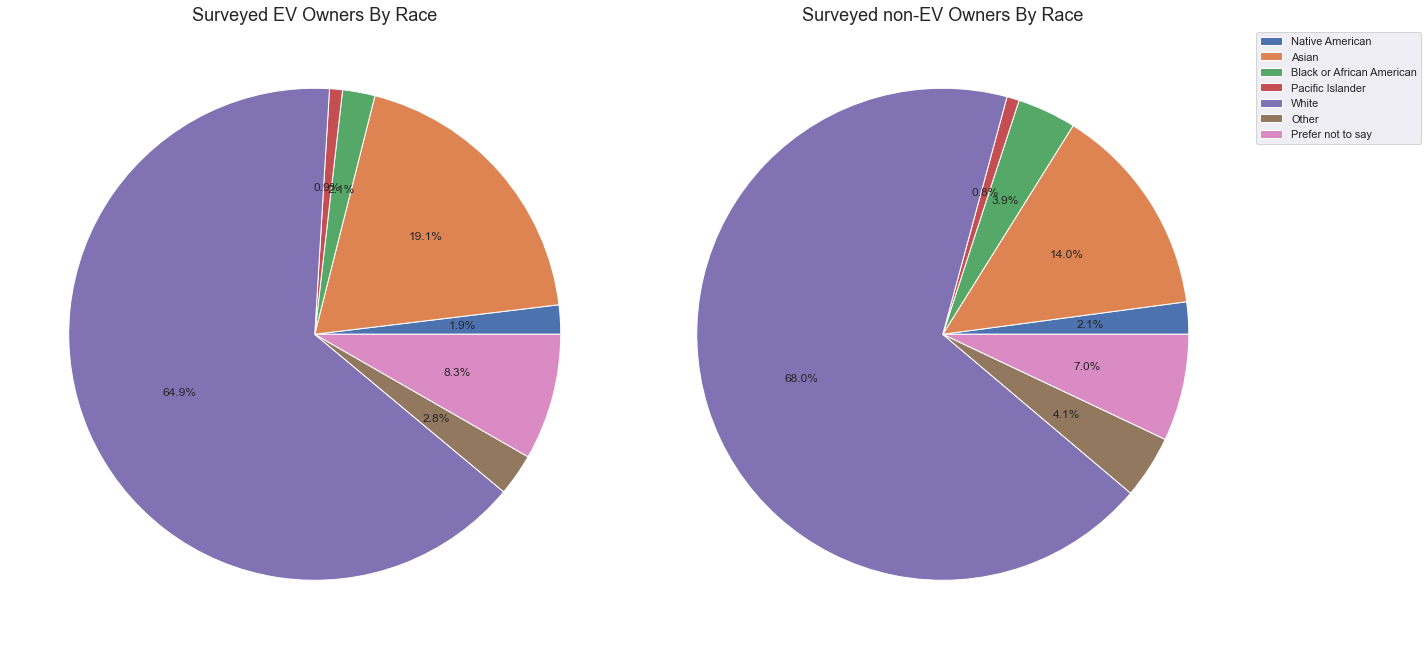

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies

labels = "Native American","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say"
values =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Race', fontsize=18)


values =(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
ax2.pie(values,autopct = '%1.1f%%') #plot second pie
#ax2.title('Surveyed non-EV Owners By Race')
ax2.legend(labels,bbox_to_anchor=(1, 1))
#plt.figtext(1,1,'Surveyed EV Owners v non-EV Owners By Race', fontsize=18, ha='center')
ax2.set_title('Surveyed non-EV Owners By Race', fontsize=18)
plt.tight_layout()

In [20]:
owner_race =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
owner_race.values
no_own_by_race=(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
print(owner_race.values,no_own_by_race.values)


[  9  90  10   4 305  13  39] [  83  550  152   32 2673  163  276]


In [21]:
#converting count into % totals labelled
race_df = pd.DataFrame({    
    'EV owners': [9,  90,  10,   4, 305,  13,  39],
    'Non-EV owners': [83,  550,  152,   32, 2673,  163,  276]
})
race_df=(100. * race_df / race_df.sum()).round(1)
Race =("American Indian or Alaska Native","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say")
  
race_df['Race']= Race  
race_df

,EV owners,Non-EV owners,Race
0,1.9,2.1,American Indian or Alaska Native
1,19.1,14.0,Asian
2,2.1,3.9,Black or African American
3,0.9,0.8,Pacific Islander
4,64.9,68.0,White
5,2.8,4.1,Other
6,8.3,7.0,Prefer not to say


In [22]:
print(owner_merged_df['ethnicity'].value_counts())
print(nonowner_merged_df['ethnicity'].value_counts())

2    394
1     35
3     22
Name: ethnicity, dtype: int64
2    3273
1     388
3     136
Name: ethnicity, dtype: int64


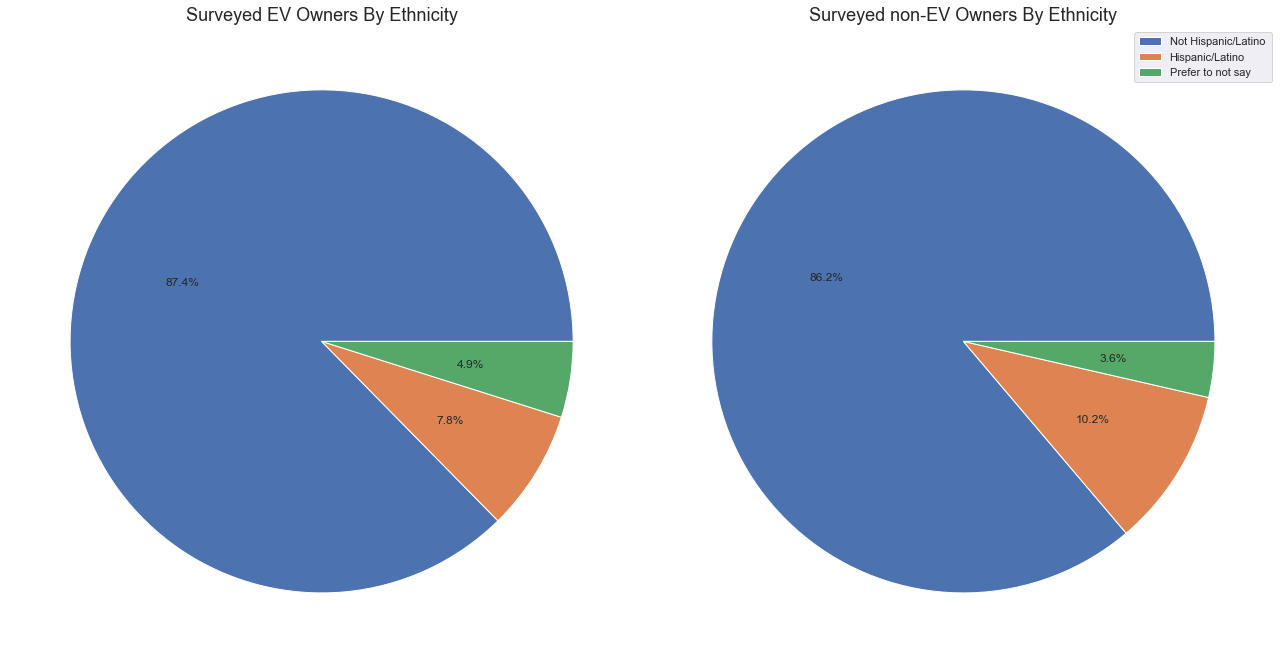

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
labels=  "Not Hispanic/Latino ","Hispanic/Latino","Prefer to not say"

values =(owner_merged_df['ethnicity'].value_counts())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Ethnicity', fontsize=18)

values =(nonowner_merged_df['ethnicity'].value_counts())
ax2.pie(values,autopct = '%1.1f%%') #plot first pie
ax2.set_title('Surveyed non-EV Owners By Ethnicity', fontsize=18)
ax2.legend(labels,bbox_to_anchor=(1, 1))
plt.tight_layout()

In [24]:
print(owner_merged_df['age_grp'].value_counts())
print(nonowner_merged_df['age_grp'].value_counts())

3    288
4    111
2     52
Name: age_grp, dtype: int64
3    1958
4    1363
2     476
Name: age_grp, dtype: int64


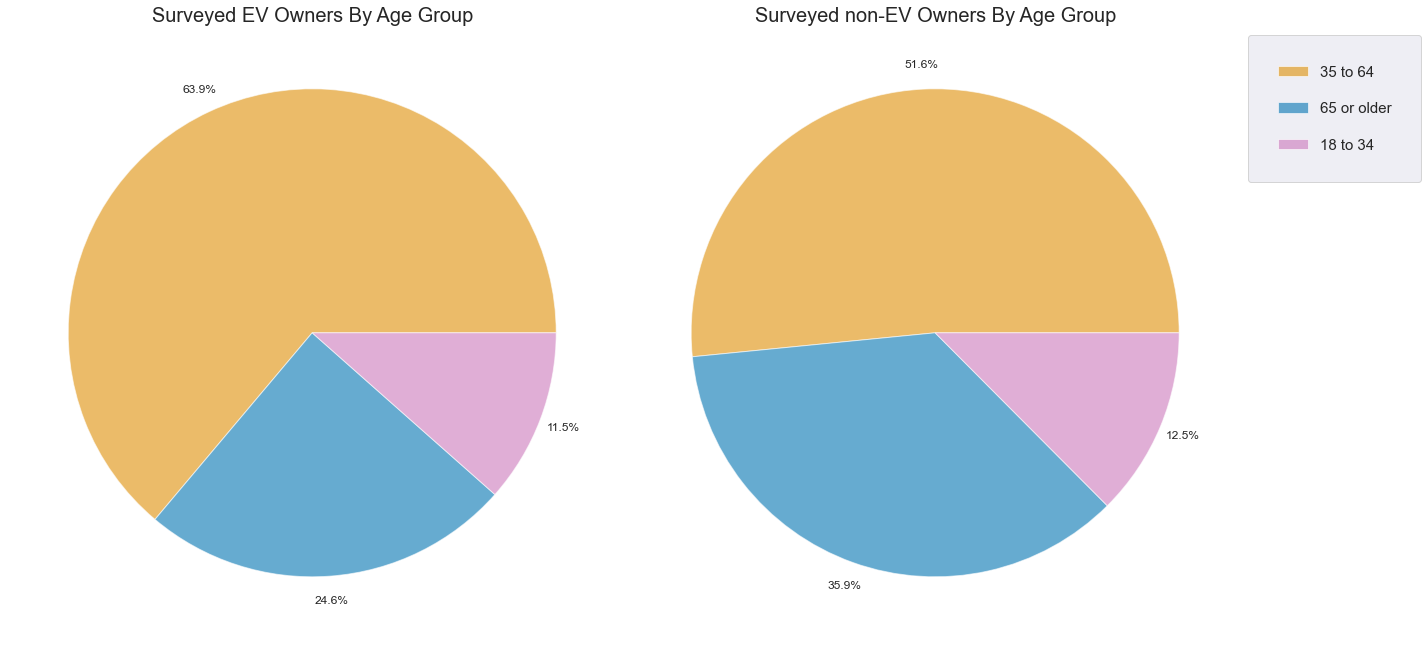

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
labels=  "35 to 64 ","65 or older","18 to 34"

values =(owner_merged_df['age_grp'].value_counts())
colors = ['#de8f05','#0173b2','#cc78bc']
ax1.pie( values,wedgeprops={'alpha':0.6},autopct = '%1.1f%%',pctdistance=1.1, labeldistance=1.2,colors=colors) #plot first pie
ax1.set_title('Surveyed EV Owners By Age Group', fontsize=20)

values =(nonowner_merged_df['age_grp'].value_counts())
colors = ['#de8f05','#0173b2','#cc78bc']
ax2.pie(values,wedgeprops={'alpha':0.6},autopct = '%1.1f%%',pctdistance=1.1, labeldistance=1.2,colors=colors) #plot first pie
ax2.set_title('Surveyed non-EV Owners By Age Group', fontsize=20)
ax2.legend(labels,bbox_to_anchor=(1, 1),borderpad=2,labelspacing=1.5,prop={"size":15})
plt.tight_layout()

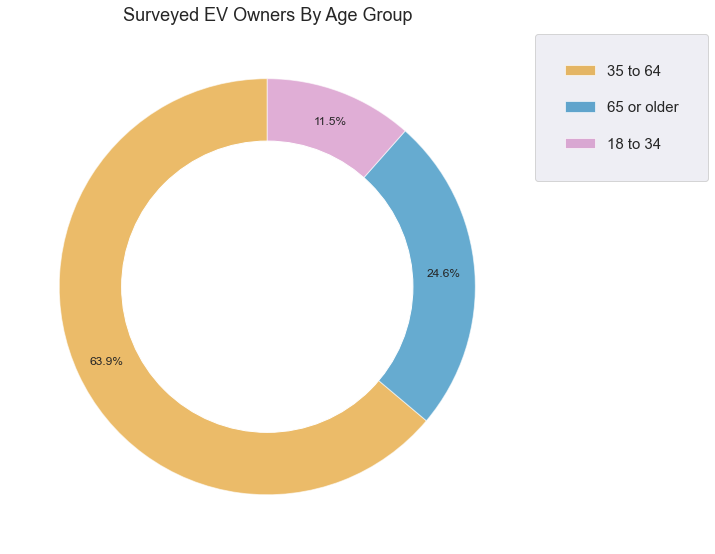

In [26]:
#Age displayed as donut!
# Pie chart
fig, ax = plt.subplots(1,figsize=(10,10)) #ax1,ax2 refer to your two pies
labels = ["35 to 64 ","65 or older","18 to 34"]
values =(owner_merged_df['age_grp'].value_counts())
#colors
colors = ['#de8f05','#0173b2','#cc78bc']
#explsion
explode = (0.0,0.0,0.00)
 
ax.pie(values, colors = colors,wedgeprops={'alpha':0.6},autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.set_title('Surveyed EV Owners By Age Group', fontsize=18)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax.legend(labels,bbox_to_anchor=(1, 1),borderpad=2,labelspacing=1.5,prop={"size":15})
plt.tight_layout()
plt.show()

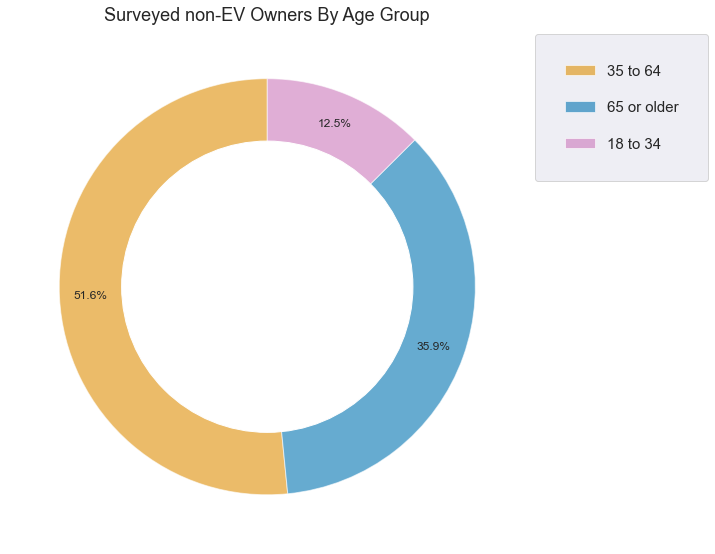

In [27]:
fig, ax = plt.subplots(1,figsize=(10,10)) #ax1,ax2 refer to your two pies
labels = ["35 to 64 ","65 or older","18 to 34"]
values =(nonowner_merged_df['age_grp'].value_counts())
#colors
colors = ['#de8f05','#0173b2','#cc78bc']
#explsion
explode = (0.0,0.0,0.00)
 
ax.pie(values, colors = colors,wedgeprops={'alpha':0.6}, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.set_title('Surveyed non-EV Owners By Age Group', fontsize=18)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax.legend(labels,bbox_to_anchor=(1, 1),borderpad=2,labelspacing=1.5,prop={"size":15})
plt.tight_layout()
plt.show()

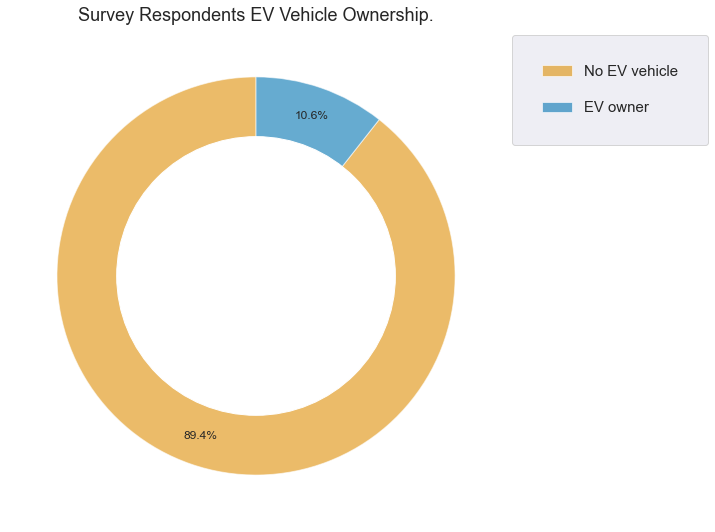

In [28]:
fig, ax = plt.subplots(1,figsize=(10,10)) #ax1,ax2 refer to your two pies
labels = ["No EV vehicle","EV owner"]
values =(respondent_merged_df['PEV owner'].value_counts())
#colors
colors = ["#de8f05", "#0173b2"]
#explsion
explode = (0.0,0.0,0.00)
 
ax.pie(values, colors = colors,wedgeprops={'alpha':0.6}, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.set_title('Survey Respondents EV Vehicle Ownership.', fontsize=18)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
ax.legend(labels,bbox_to_anchor=(1, 1),borderpad=2,labelspacing=1.5,prop={"size":15})
plt.tight_layout()
plt.show()

In [29]:
respondent_merged_df['PEV owner'].value_counts()

No     3797
Yes     451
Name: PEV owner, dtype: int64

In [30]:
respondent_merged_df['gender'].value_counts()

1    2242
2    1957
4      43
3       6
Name: gender, dtype: int64

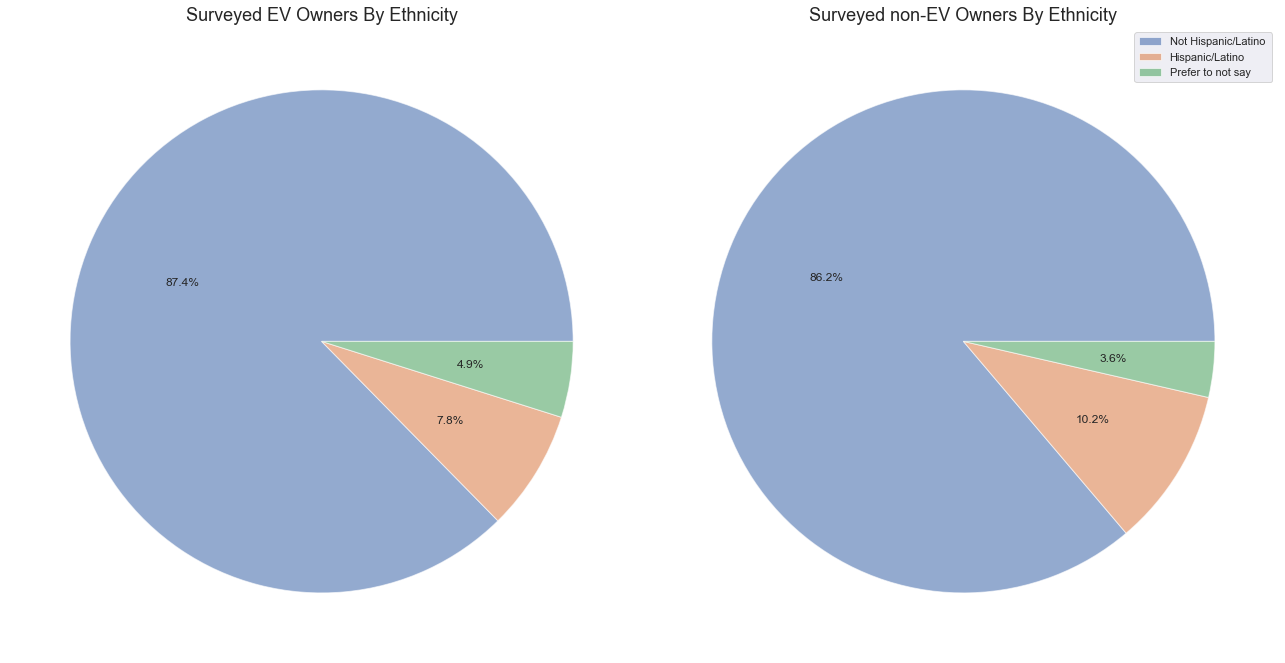

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
labels=  "Not Hispanic/Latino ","Hispanic/Latino","Prefer to not say"

values =(owner_merged_df['ethnicity'].value_counts())
ax1.pie(values,wedgeprops={'alpha':0.6},autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Ethnicity', fontsize=18)

values =(nonowner_merged_df['ethnicity'].value_counts())
ax2.pie(values,wedgeprops={'alpha':0.6},autopct = '%1.1f%%') #plot first pie
ax2.set_title('Surveyed non-EV Owners By Ethnicity', fontsize=18)
ax2.legend(labels,bbox_to_anchor=(1, 1))
plt.tight_layout()

In [32]:
Test_df =respondent_merged_df[['age_grp','income','education','PEV owner']]
Test_df=Test_df[Test_df['income'] != 11]
Test_df

,age_grp,income,education,PEV owner
1,3,8,8,No
3,4,7,3,No
4,3,7,8,No
5,3,2,4,No
6,3,9,5,No
...,...,...,...,...
4243,3,7,3,Yes
4244,3,9,8,No
4245,3,9,8,Yes
4246,4,8,8,No


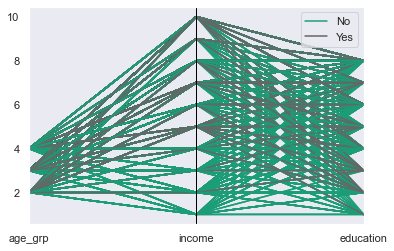

In [33]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
#import pandas.plotting
#import parallel_coordinates 
data = Test_df

# Make the plot
parallel_coordinates(data, 'PEV owner', colormap=plt.get_cmap("Dark2"))
plt.show()

In [34]:
df1 = pd.DataFrame({'Age': ['18-34','35-64','65+'], 
                    'EV Owners': [11.5,63.9,24.6], 
                    'Non-EV Owners': [12.5,51.6,35.9]})
df1

,Age,EV Owners,Non-EV Owners
0,18-34,11.5,12.5
1,35-64,63.9,51.6
2,65+,24.6,35.9


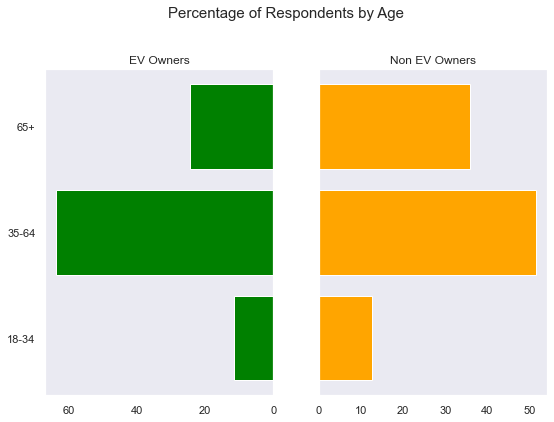

In [35]:
#Attempt at population pyramid
#define x and y limits
y = range(0, len(df1))
x_EV = df1['EV Owners']
x_nonEV = df1['Non-EV Owners']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:white')
plt.figtext(.5,1.0,"Percentage of Respondents by Age ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_EV, align='center', color='green')
axes[0].set(title='EV Owners')
axes[1].barh(y, x_nonEV, align='center', color='orange')
axes[1].set(title='Non EV Owners')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df1['Age'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

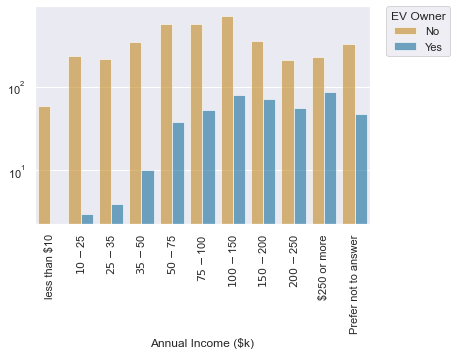

In [36]:
# Draw a nested barplot income /owner

colors = ["#de8f05", "#0173b2"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
g = sns.countplot(
    data=respondent_merged_df, 
    x="income", hue= "PEV owner", palette = customPalette,
      alpha=0.6,
)
g.set_xticklabels(["less than $10",
"$10 - $25",
"$25 - $35",
"$35 - $50",
"$50 - $75",
"$75 - $100",
"$100 - $150",
"$150 - $200",
"$200 - $250",
"$250 or more",
"Prefer not to answer"],rotation=90)

#g.despine(left=True)
g.set(xlabel="Annual Income ($k)", ylabel = "")
g.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title("EV Owner")
#g.set_axis_labels("Annual Income($k)", " ")
#g.legend.set_title("")

In [56]:
#Drop "prefer not to say"
df_income_declared = respondent_merged_df[respondent_merged_df['income'] != 11]

In [57]:
df_income_declared.income.value_counts()

7     779
6     615
5     598
8     430
4     354
10    317
9     265
2     235
3     221
1      59
Name: income, dtype: int64

# Categorical distribution plots

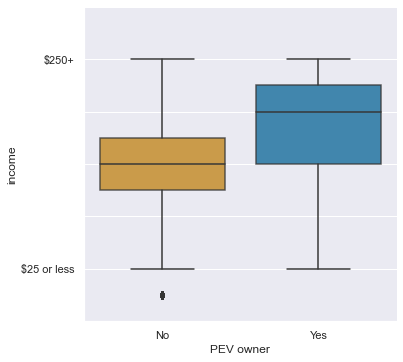

In [40]:
colors = ["#de8f05", "#0173b2"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

#Income /PEV non-PEV
g= sns.catplot(x="PEV owner", y="income", kind="box",palette=customPalette,boxprops=dict(alpha=.8), data=df_income_declared)
g.set_yticklabels(["",
"$25 or less",

"",

"",

"",

"$250+",""
])   


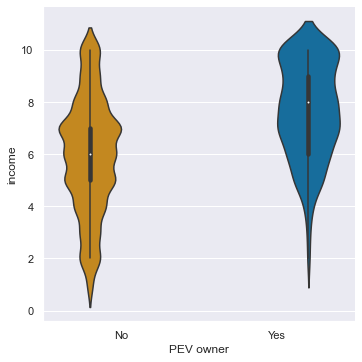

In [41]:
sns.catplot(x="PEV owner", y="income", hue="PEV owner",
            kind="violin", data=df_income_declared)

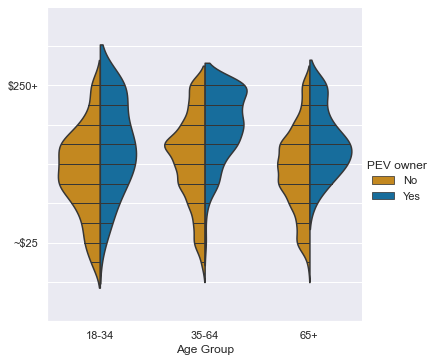

In [42]:
colors = ["#de8f05", "#0173b2"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

g=sns.catplot(x="age_grp", y="income", hue="PEV owner",
            kind="violin",inner="stick",split=True, palette=customPalette,violinprops=dict(alpha=.2),  data=df_income_declared)
plt.setp(ax.collections, alpha=.6)
g.set_xticklabels(['18-34','35-64','65+'])
g.set(xlabel="Age Group", ylabel = "")
g.set_yticklabels(["","",
"~$25",

"",

"",

"",

"$250+","",""])


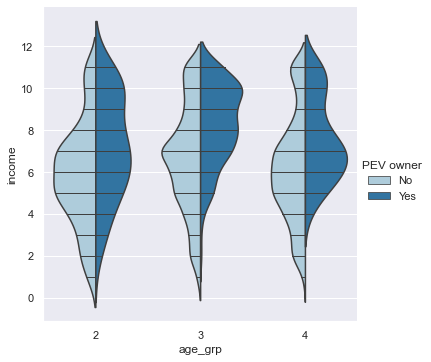

In [43]:
sns.set_palette("Paired")
sns.catplot(x="age_grp", y="income", hue="PEV owner",
            kind="violin",inner="stick",split=True,
           
            data=respondent_merged_df)

[Text(0.5, 0, ''), Text(0, 0.5, 'Respondents(log)')]

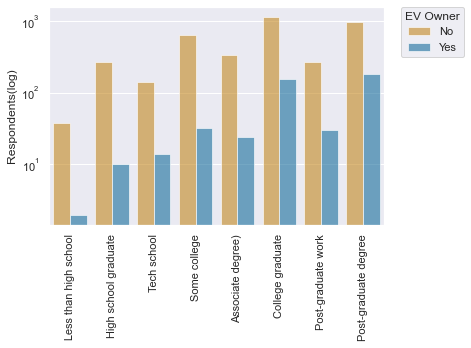

In [51]:
colors = ["#de8f05","#0173b2"]
customPalette = sns.set_palette(sns.color_palette(colors))
# Set your custom color palette

g=sns.countplot(
    data=respondent_merged_df, 
    x="education",hue="PEV owner",
     alpha=0.6
)
g.set_xticklabels(["Less than high school",
                   "High school graduate","Tech school",
"Some college","Associate degree)",
"College graduate",
"Post-graduate work",
"Post-graduate degree"],rotation=90)
g.set_yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title("EV Owner")
#g.set_title("Education level")
g.set(xlabel="", ylabel = "Respondents(log)")

[Text(0.5, 0, ''), Text(0, 0.5, 'Respondents')]

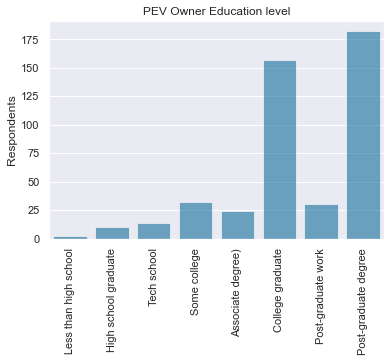

In [44]:
colors = ["#de8f05","#0173b2"]
customPalette = sns.set_palette(sns.color_palette(colors))
# Set your custom color palette

g=sns.countplot(
    data=respondent_merged_df.loc[respondent_merged_df["PEV owner"] =="Yes"], 
    x="education",color="#0173b2",
     alpha=0.6
)
g.set_xticklabels(["Less than high school",
                   "High school graduate","Tech school",
"Some college","Associate degree)",
"College graduate",
"Post-graduate work",
"Post-graduate degree"],rotation=90)
#g.set_yscale("log")
##plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title("EV Owner")
g.set_title("PEV Owner Education level")
g.set(xlabel="", ylabel = "Respondents")

[Text(0.5, 0, ''), Text(0, 0.5, 'Respondents')]

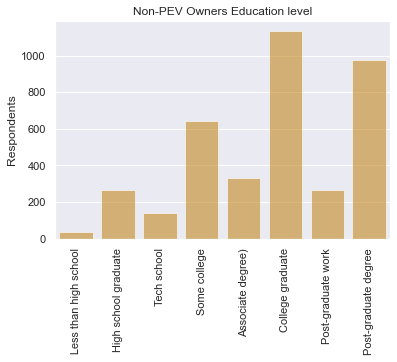

In [45]:
colors = ["#de8f05","#0173b2"]
customPalette = sns.set_palette(sns.color_palette(colors))
# Set your custom color palette

g=sns.countplot(
    data=respondent_merged_df.loc[respondent_merged_df["PEV owner"] =="No"], 
    x="education",color="#de8f05",
     alpha=0.6
)
g.set_xticklabels(["Less than high school",
                   "High school graduate","Tech school",
"Some college","Associate degree)",
"College graduate",
"Post-graduate work",
"Post-graduate degree"],rotation=90)
#g.set_yscale("log")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title("EV Owner")
g.set_title("Non-PEV Owners Education level")
g.set(xlabel="", ylabel = "Respondents")

In [43]:
respondent_merged_df.loc[respondent_merged_df["PEV owner"] =="Yes"]

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x,PEV owner,Male/Female,
40,192569,4,1,3,1,31,6,2,4,0,...,0,0,0,1,0,0,,Yes,Female,Other/Not stated
41,192756,4,1,3,1,37,4,1,2,0,...,0,0,0,1,0,0,,Yes,Female,Other/Not stated
105,192597,4,1,3,1,7,5,2,2,0,...,0,0,0,1,0,0,,Yes,Female,Other/Not stated
129,192047,4,1,3,1,1,5,2,3,0,...,0,0,0,1,0,0,,Yes,Female,Other/Not stated
132,192359,4,1,4,1,40,3,3,2,0,...,0,0,0,1,0,0,,Yes,Female,Other/Not stated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,194031,5,1,2,1,19,2,1,3,0,...,0,0,0,1,0,0,,Yes,Male,Other/Not stated
4241,190293,2,1,3,1,37,4,3,3,0,...,1,0,0,0,0,0,,Yes,Male,Other/Not stated
4242,190650,5,1,3,1,27,3,1,3,0,...,0,0,0,1,0,0,,Yes,Male,Other/Not stated
4243,190256,2,1,3,1,19,2,2,3,1,...,0,0,0,1,0,0,,Yes,Male,Other/Not stated


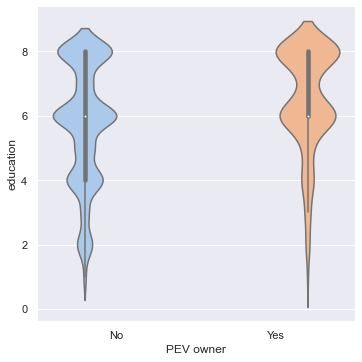

In [46]:
sns.catplot(x="PEV owner", y="education", hue="PEV owner",
            kind="violin",palette="pastel", data=respondent_merged_df)

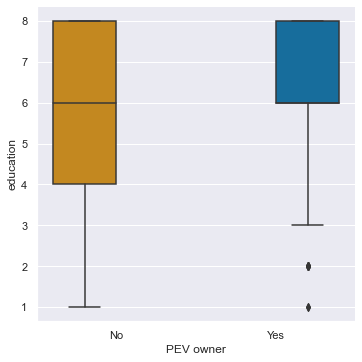

In [47]:
colors = ["#de8f05", "#0173b2"]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.catplot(x="PEV owner", y="education", hue="PEV owner",
            kind="box",palette=customPalette, data=respondent_merged_df)

In [58]:
respondent_merged_df.loc[respondent_merged_df.education==8].count()

sampno         1160
source         1160
language       1160
age_grp        1160
california     1160
               ... 
race_7         1160
race_6_x       1160
PEV owner      1160
Male/Female    1160
               1160
Length: 114, dtype: int64

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, '')]

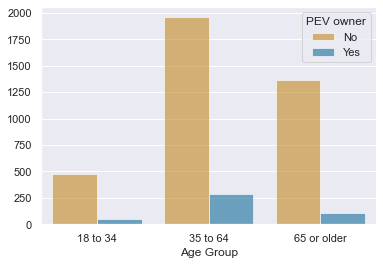

In [49]:
colors = ["#de8f05", "#0173b2"]
customPalette = sns.set_palette(sns.color_palette(colors))
g=sns.countplot(
    data=respondent_merged_df, 
    x="age_grp", hue= "PEV owner",
    palette=customPalette, alpha=.6,
)
g.set_xticklabels(["18 to 34", "35 to 64", "65 or older"])
g.set(xlabel="Age Group", ylabel = "")

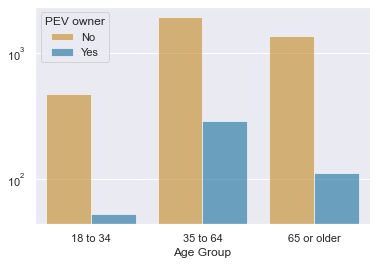

In [50]:
colors = ["#de8f05", "#0173b2"]
customPalette = sns.set_palette(sns.color_palette(colors))
g=sns.countplot(
    data=respondent_merged_df, 
    x="age_grp", hue= "PEV owner",
    palette=customPalette, alpha=.6,
)
g.set_xticklabels(["18 to 34", "35 to 64", "65 or older"])
g.set(xlabel="Age Group", ylabel = "")
g.set_yscale("log")

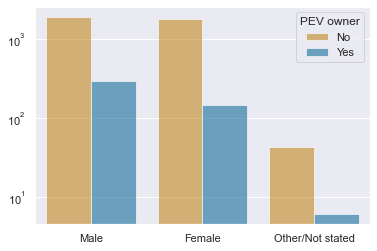

In [51]:
colors = ["#de8f05", "#0173b2"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
g=sns.countplot(
    data=respondent_merged_df, 
    x="Male/Female", hue= "PEV owner",
    palette=customPalette, alpha=.6,
)
#g.set_xticklabels(["18 to 34", "35 to 64", "65 or older"])
g.set(xlabel="", ylabel = "")
g.set_yscale("log")

# Income and edumacation

In [59]:
# Income/Education level v PEV ownership summary stats. Higher number is more for both.
nonowner_inc_dec_df =df_income_declared.loc[df_income_declared['PEV owner'] == 0]

nonowner_inc_dec_df [["income","education"]].describe()

,income,education
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [60]:
owner_inc_dec_df =df_income_declared.loc[df_income_declared['PEV owner'] == 1]

owner_inc_dec_df [["income","education"]].describe()

,income,education
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


[Text(0, 0, 'Less than high school'),
 Text(1, 0, 'High school graduate'),
 Text(2, 0, 'Tech school'),
 Text(3, 0, 'Some college'),
 Text(4, 0, 'Associate degree)'),
 Text(5, 0, 'College graduate'),
 Text(6, 0, 'Post-graduate work'),
 Text(7, 0, 'Post-graduate degree')]

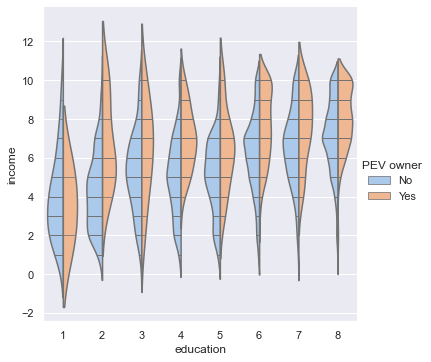

In [88]:
# Income/Education level v PEV ownership
sns.catplot(x="education", y="income", hue="PEV owner",
            kind="violin",inner="stick",split=True,palette="pastel", data=df_income_declared)
g.set_xticklabels(["Less than high school",
                   "High school graduate","Tech school",
"Some college","Associate degree)",
"College graduate",
"Post-graduate work",
"Post-graduate degree"],rotation=90)

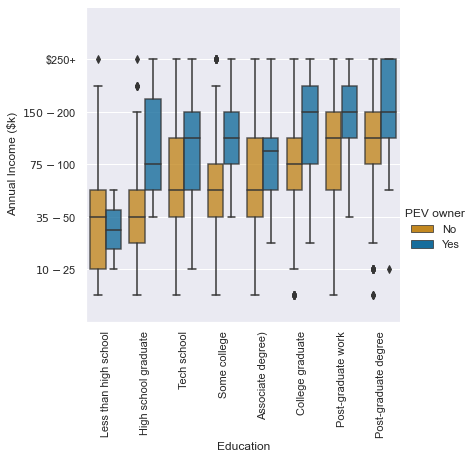

In [61]:
#Box plot showing above
colors = ["#de8f05", "#0173b2"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
g=sns.catplot(x="education", y="income", hue="PEV owner",
            kind="box",palette=customPalette,boxprops=dict(alpha=.8), data=df_income_declared)
g.set_xticklabels(["Less than high school",
                   "High school graduate","Tech school",
"Some college","Associate degree)",
"College graduate",
"Post-graduate work",
"Post-graduate degree"],rotation=90)
g.set_yticklabels(["",
"$10 - $25",
"$35 - $50",
"$75 - $100",
"$150 - $200",
"$250+",""
])
g.set(ylabel="Annual Income ($k)", xlabel = "Education")


# Got solar?

[Text(0.5, 0, 'Solar'), Text(0, 0.5, '')]

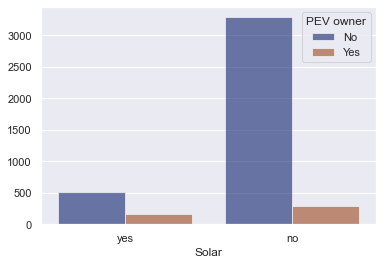

In [63]:
g=sns.countplot(
    data=respondent_merged_df, 
    x="solar", hue= "PEV owner",
    palette="dark", alpha=.6,
)
g.set_xticklabels(["yes", "no"])
g.set(xlabel="Solar", ylabel = "")
#g.set_yscale("log")

In [57]:
#1 is yes 2 is no
respondent_merged_df["solar"].value_counts()

2    3581
1     667
Name: solar, dtype: int64

In [64]:
non=nonowner_inc_dec_df [["solar"]].mean()
own=owner_inc_dec_df [["solar"]].mean()
print(f"non-owner solar mean={non}. PEV owner solarmean={own} Closer to 1 is more positive.")

non-owner solar mean=solar   NaN
dtype: float64. PEV owner solarmean=solar   NaN
dtype: float64 Closer to 1 is more positive.


# Future Solar plans?

In [59]:
owner_inc_dec_df["solar_future"].unique()


array([], dtype=object)

In [60]:
#Drop those pesky spaces in the "solar_future" column for a mo.
own_SF_DF =owner_inc_dec_df.loc[owner_inc_dec_df["solar_future"]
                                != ' ' ]
nonown_SF_DF =nonowner_inc_dec_df.loc[nonowner_inc_dec_df["solar_future"]
                                != ' ' ]

nonown_SF_DF["solar_future"].nunique()

0

In [61]:
SF_DF= respondent_merged_df.loc[respondent_merged_df["solar_future"]!=' ']

In [62]:
# 1. Yes 2. No
print(nonown_SF_DF["solar_future"].value_counts())
print(own_SF_DF["solar_future"].value_counts())


Series([], Name: solar_future, dtype: int64)
Series([], Name: solar_future, dtype: int64)


[Text(0.5, 0, 'solar_future'), Text(0, 0.5, '')]

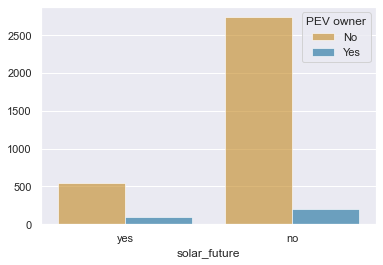

In [63]:
colors = ["#de8f05", "#0173b2"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
g=sns.countplot(
    data=SF_DF, 
    x="solar_future", hue= "PEV owner",
    palette= customPalette, alpha=.6,
)
g.set_xticklabels(["yes", "no"])
g.set(xlabel="solar_future", ylabel = "")

In [64]:
nonfut= nonown_SF_DF["solar_future"].mean()
ownfut=own_SF_DF[["solar_future"]].mean()
print(f"non-owner future solar plan mean={nonfut}. PEV owner future solar plan mean={ownfut} Closer to 1 is more positive.")

non-owner future solar plan mean=nan. PEV owner future solar plan mean=solar_future   NaN
dtype: float64 Closer to 1 is more positive.


<AxesSubplot:xlabel='PEV owner', ylabel='solar'>

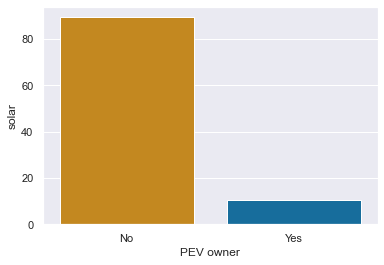

In [65]:

sns.barplot(x="PEV owner", y="solar", data=respondent_merged_df, estimator=lambda x: len(x) / len(respondent_merged_df) * 100)

In [66]:
#"charge_spots"
respondent_merged_df['charge_spots'].value_counts()

3    1480
4    1144
      488
1     460
2     423
5     253
Name: charge_spots, dtype: int64

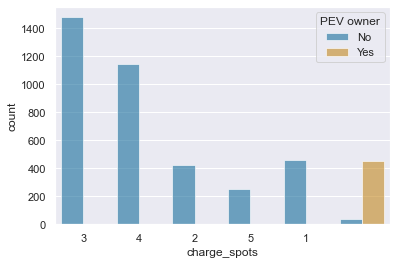

In [67]:
g=sns.countplot(
    data=respondent_merged_df, 
    x="charge_spots", hue= "PEV owner",
    palette="colorblind", alpha=.6,
)
#g.set_xticklabels(["18 to 34", "35 to 64", "65 or older"])
#g.set(xlabel="Age Group", ylabel = "")

In [68]:
owner_merged_df['charge_spots'].value_counts()


     451
Name: charge_spots, dtype: int64

In [69]:
nonowner_merged_df['home_parking_5'].value_counts()


0    2670
1    1090
       37
Name: home_parking_5, dtype: int64

In [70]:
#1.We would be one of the first to buy a self-driving vehicle (either as a replacement or additional household vehicle)
#2.We would eventually buy a self-driving vehicle, but only after they are in common use
#3.We would wait as long as possible and try to avoid ever buying a self-driving vehicle

owner_merged_df['autonomous_hhveh'].value_counts()

2    254
1    114
3     83
Name: autonomous_hhveh, dtype: int64

In [71]:
nonowner_merged_df['autonomous_hhveh'].value_counts()

3    1874
2    1656
1     267
Name: autonomous_hhveh, dtype: int64

[Text(0.5, 0, ''), Text(0, 0.5, '')]

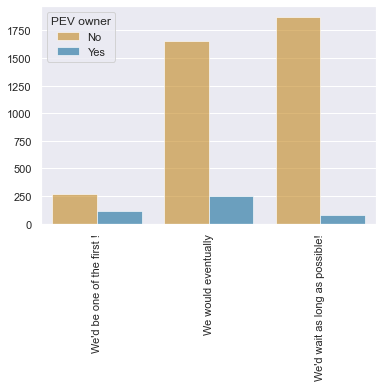

In [72]:
#1.We would be one of the first to buy a self-driving vehicle (either as a replacement or additional household vehicle)
#2.We would eventually buy a self-driving vehicle, but only after they are in common use
#3.We would wait as long as possible and try to avoid ever buying a self-driving vehicle
colors = ["#de8f05", "#0173b2"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
g=sns.countplot(
    data=respondent_merged_df, 
    x='autonomous_hhveh', hue= "PEV owner",
    palette=customPalette, alpha=.6,
)
g.set_xticklabels(["We'd be one of the first !", "We would eventually", "We'd wait as long as possible!"],rotation=90)
g.set(xlabel="", ylabel = "")
#g.set_yscale("log")

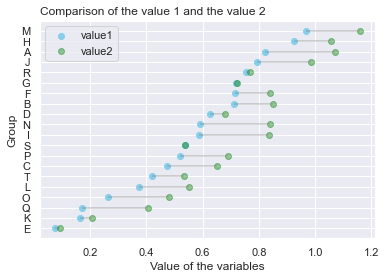

In [73]:
# Create a dataframe
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='value1')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='value2')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Group')

# Show the graph
plt.show()

In [74]:
>>> '#de8f05','#0173b2','#029e73'
>>> pal = sns.color_palette("colorblind")
>>> print(pal.as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


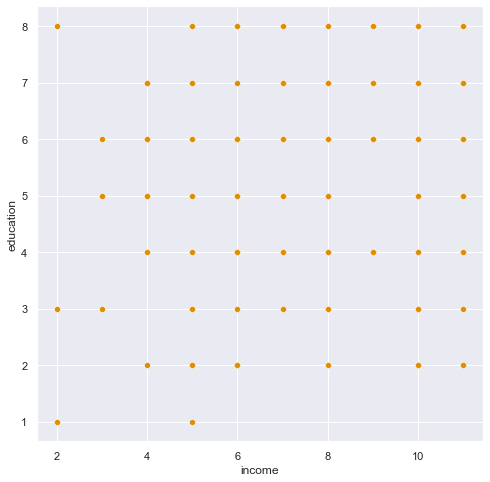

In [75]:
plt.rcParams['figure.figsize'] = [8, 8]

# data 
data = respondent_merged_df.loc[respondent_merged_df["PEV owner"]=='Yes']
 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="income", y="education", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

In [76]:
respondent_merged_df["Genders"] =respondent_merged_df[""] = "Other"
respondent_merged_df.loc[respondent_merged_df.gender == 1,'Genders'] = "Male"
respondent_merged_df.loc[respondent_merged_df.gender == 2,'Genders'] = "Female"

In [77]:
respondent_merged_df.Genders.value_counts()

Male      2242
Female    1957
Other       49
Name: Genders, dtype: int64

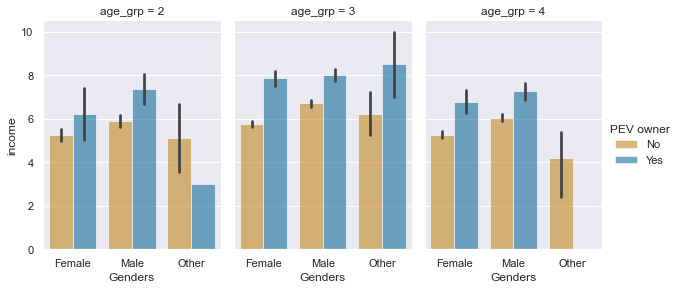

In [78]:

colors = ["#de8f05", "#0173b2"]
customPalette = sns.set_palette(sns.color_palette(colors))
data = respondent_merged_df.loc[respondent_merged_df.income != 11]
g = sns.catplot( x="Genders", y="income",
                hue="PEV owner", col="age_grp",
                data=data, kind="bar", alpha= 0.6,
                height=4, aspect=.7);

In [79]:
respondent_merged_df.income.value_counts()

7     779
6     615
5     598
8     430
11    375
4     354
10    317
9     265
2     235
3     221
1      59
Name: income, dtype: int64